In [34]:
# we want to classify our diarization output in terms of
import os
from tqdm import tqdm 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
DIR="/shared/3/projects/benlitterer/podcastData/diarization/mayJune"
speakerCounts = []
for path, folders, files in tqdm(os.walk(DIR)): 
    for filename in files:
        fullPath = os.path.join(path, filename)  
        with open(fullPath, "r") as f: 
            speakerList = [line.split()[7] for line in f.readlines()]
            uniqueSpeakers = set(speakerList)
            speakerCount = len(uniqueSpeakers)
            speakerCounts.append((fullPath, speakerCount))

4707it [00:25, 188.10it/s]


In [47]:
speakerCountDf = pd.DataFrame(speakerCounts, columns=["path", "speakerCount"]) 

In [48]:
print(speakerCountDf.shape)

(12484, 2)


Text(0, 0.5, '# of speakers')

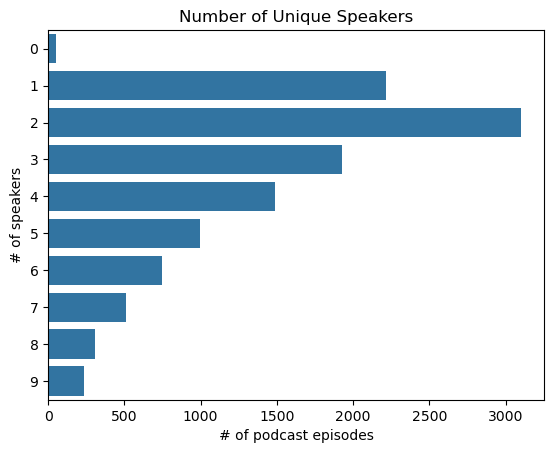

In [49]:
sns.countplot(speakerCountDf[speakerCountDf["speakerCount"] < 10], y="speakerCount")
plt.title("Number of Unique Speakers")
plt.xlabel("# of podcast episodes")
plt.ylabel("# of speakers")

In [61]:
speakerCountDf.to_json("/shared/3/projects/benlitterer/podcastData/detectHostNumber/hostNumDf.jsonl", orient="records", lines=True)